<a href="https://colab.research.google.com/github/edpar3/edpar3.github.io/blob/main/kaggle_fundamentals_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

path_train = '/content/gdrive/MyDrive/datasets/titanic_train.csv'
path_test = '/content/gdrive/MyDrive/datasets/titanic_test.csv'

train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


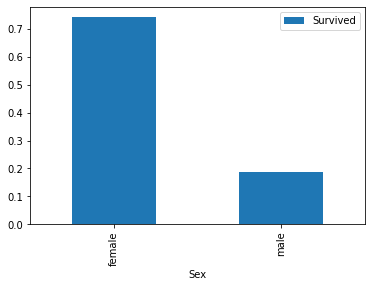

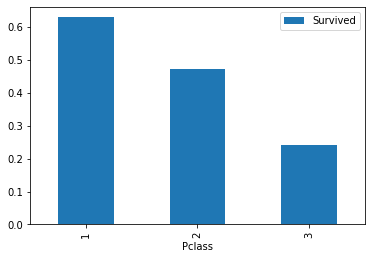

In [ ]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()
plt.show()

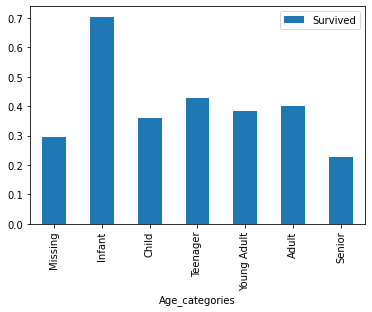

In [ ]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = [
    'Missing',
    'Infant',
    'Child',
    'Teenager',
    'Young Adult',
    'Adult',
    'Senior'
]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

age_pivot = train.pivot_table(index='Age_categories', values='Survived')
age_pivot.plot.bar()
plt.show()

In [ ]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df,dummies], axis=1)
    return df

train = create_dummies(train, 'Pclass')
test = create_dummies(test, 'Pclass')

train = create_dummies(train, 'Sex')
test = create_dummies(test, 'Sex')

train = create_dummies(train, 'Age_categories')
test = create_dummies(test, 'Age_categories')

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0


In [ ]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train.Survived

lr = LogisticRegression()
lr.fit(all_X, all_y)
predictions = lr.predict(test[columns])

In [ ]:
# test_ids = test['PassengerId']
# submission_df = {'PassengerId': test_ids,
#                  'Survived': predictions}
# submission = pd.DataFrame(submission_df)
# path_sub = '/content/gdrive/MyDrive/python/dataquest/kaggle_submission_01.csv'
# submission.to_csv(path_sub, index=False)

In [ ]:
# This submission received an accuracy score of .76315.

In [ ]:
# Scale the 'SibSp', 'Parch', and 'Fare' variables.

from sklearn.preprocessing import minmax_scale

# The test set has a missing value in the Fare column which
# We'll fill it with the mean from the train set.
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())
columns = ['SibSp','Parch','Fare']

train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

train = create_dummies(train,'Embarked')
test = create_dummies(test,'Embarked')

for col in columns:
    train[col + '_scaled'] = minmax_scale(train[col])
    test[col + '_scaled'] = minmax_scale(test[col])

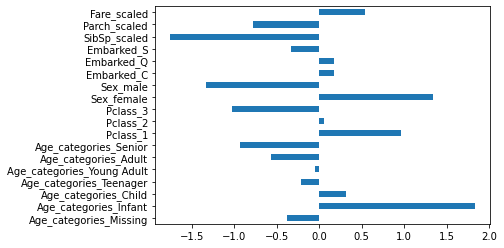

In [ ]:
# Use the coefficients method to identify the best-performing features

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()
lr.fit(train[columns], train.Survived)
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index=train[columns].columns)
feature_importance.plot.barh()
plt.show()

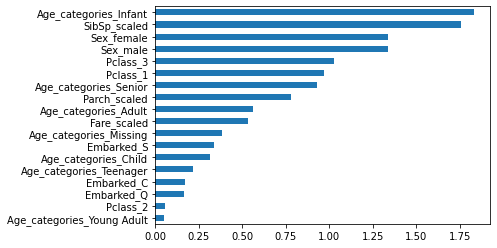

In [ ]:
# Now show them as absolute values sorted in descending order.

ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [ ]:
# Train and model with the top 8 features.

columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]
all_y = train['Survived']

lr = LogisticRegression()
lr.fit(all_X, all_y)
predictions = lr.predict(test[columns])

In [ ]:
# Prepare a submission CSV.

# test_ids = test['PassengerId']
# submission_df = {'PassengerId': test_ids,
#                  'Survived': predictions}
# submission = pd.DataFrame(submission_df)
# path_sub = '/content/gdrive/MyDrive/python/dataquest/kaggle_submission_02.csv'
# submission.to_csv(path_sub, index=False)

In [ ]:
# Turn the 'Fare' variable into a binned categorical variable.
# Create dummy variable for the new 'Fare_categories" variable.

def process_fare(df, cut_points, label_names):
    df['Fare_categories'] = pd.cut(df['Fare'], cut_points, labels=label_names)
    return df

cut_points = [0, 12, 50, 100, 1000]

label_names = [
    '0-12',
    '12-50',
    '50-100',
    '100+'
]

train = process_fare(train, cut_points, label_names)
test = process_fare(test, cut_points, label_names)

train = create_dummies(train, 'Fare_categories')
test = create_dummies(test, 'Fare_categories')

In [ ]:
# Engineer two new features: 'Title' and 'Cabin_type'.

titles = {
    'Mr' :         'Mr',
    'Mme':         'Mrs',
    'Ms':          'Mrs',
    'Mrs':         'Mrs',
    'Master':      'Master',
    'Mlle':        'Miss',
    'Miss':        'Miss',
    'Capt':        'Officer',
    'Col':         'Officer',
    'Major':       'Officer',
    'Dr':          'Officer',
    'Rev':         'Officer',
    'Jonkheer':    'Royalty',
    'Don':         'Royalty',
    'Sir':         'Royalty',
    'Countess':    'Royalty',
    'Dona':        'Royalty',
    'Lady':        'Royalty'
}

extracted_titles = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'] = extracted_titles.map(titles)

extracted_titles = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = extracted_titles.map(titles)

train['Cabin_type'] = train.Cabin.str[0].fillna('Unknown')
test['Cabin_type'] = test.Cabin.str[0].fillna('Unknown')

train = create_dummies(train, 'Title')
train = create_dummies(train, 'Cabin_type')
test = create_dummies(test, 'Title')
test = create_dummies(test, 'Cabin_type')

In [ ]:
# Function for checking for collinearity with a correlation heatmap.

import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

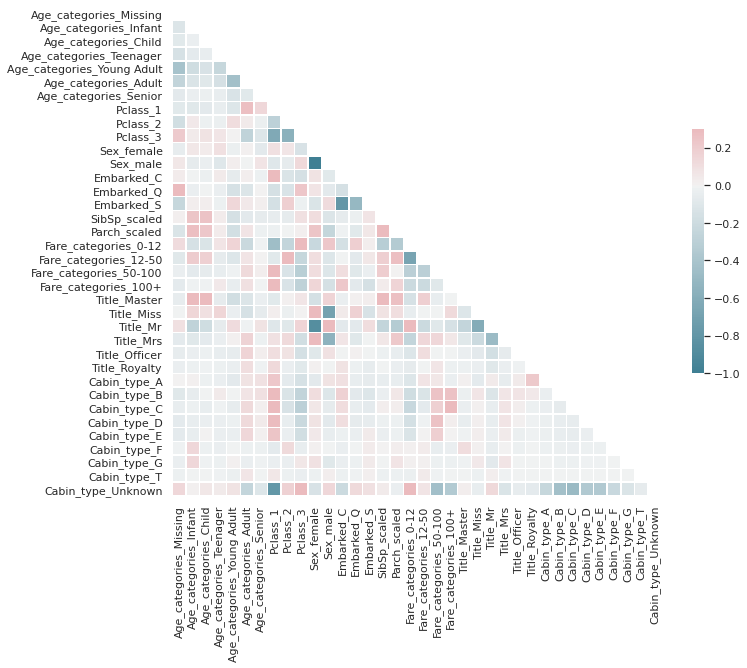

In [ ]:
# Generate correlation heat map for variables of interest.

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E','Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns])

In [ ]:
# Sex_female/Sex_male and Title_Miss/Title_Mr/Title_Mrs are highly correlated.
# We'll remove Sex_female and Sex_male as the title data may be more nuanced.
# We also remove one of each of our dummy variables to reduce the collinearity.
# Pclass_2, Age_categories_Teenager, Fare_categories_12-50...
# Title_Master, Cabin_type.

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

In [ ]:
# Recursive Feature Elimination (RFECV) is used to select optimal features.

from sklearn.feature_selection import RFECV

all_X = train[columns]
all_y = train['Survived']

lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all_X, all_y)

optimized_columns = all_X.columns[selector.support_]

In [ ]:
print(optimized_columns)

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')


In [ ]:
all_X = train[optimized_columns]
all_y = train['Survived']

lr = LogisticRegression()
lr.fit(all_X, all_y)
predictions = lr.predict(test[optimized_columns])

In [ ]:
# test_ids = test['PassengerId']
# submission_df = {'PassengerId': test_ids,
#                  'Survived': predictions}
# submission = pd.DataFrame(submission_df)
# path_sub = '/content/gdrive/MyDrive/python/dataquest/kaggle_submission_03.csv'
# submission.to_csv(path_sub, index=False)